# Consumer Behavior Data Set

-------------------

In [332]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Behavior Data
behavior_data = pd.read_csv('data/behavior.csv')

## Basic Data Exploration

In [333]:
## Preliminary Data Exploration 
     # This Data Set has the most columns - so where much of my data analysis is coming from
behavior_data.columns

Index(['customer_id', 'age', 'gender', 'item', 'type', 'amount', 'location',
       'size', 'color', 'season', 'rating', 'sub_status', 'ship_type',
       'discount', 'promo_use', 'previous_order', 'pay_method', 'times'],
      dtype='object')

In [334]:
# Display basic information about the dataset
print(behavior_data.info())

# Display summary statistics
print(behavior_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     3900 non-null   int64  
 1   age             3900 non-null   int64  
 2   gender          3900 non-null   object 
 3   item            3900 non-null   object 
 4   type            3900 non-null   object 
 5   amount          3900 non-null   int64  
 6   location        3900 non-null   object 
 7   size            3900 non-null   object 
 8   color           3900 non-null   object 
 9   season          3900 non-null   object 
 10  rating          3900 non-null   float64
 11  sub_status      3900 non-null   object 
 12  ship_type       3900 non-null   object 
 13  discount        3900 non-null   object 
 14  promo_use       3900 non-null   object 
 15  previous_order  3900 non-null   int64  
 16  pay_method      3900 non-null   object 
 17  times           3900 non-null   o

## Mapping the Times Column

In [335]:
# Define a mapping dictionary - Changing this Categorical Data to Numerical
times_mapping = {
    'Fortnightly': 104,  # Assuming 26 fortnights in a year
    'Weekly': 52,
    'Annually': 1,
    'Quarterly': 4,
    'Bi-Weekly': 26,  # Assuming 26 bi-weeks in a year
    'Monthly': 12,
    'Every 3 Months': 4
}

# Create a new column with the mapped values
behavior_data['frequency'] = behavior_data['times'].map(times_mapping)

# Print the resulting DataFrame
print(behavior_data[['customer_id', 'frequency']])

      customer_id  frequency
0               1        104
1               2        104
2               3         52
3               4         52
4               5          1
...           ...        ...
3895         3896         52
3896         3897         26
3897         3898          4
3898         3899         52
3899         3900          4

[3900 rows x 2 columns]


In [336]:
# Calculate the frequency of purchases per customer
purchase_frequency = behavior_data.groupby('customer_id')['times'].sum().reset_index(name='Frequency')

# Print the resulting DataFrame
print(purchase_frequency)

      customer_id    Frequency
0               1  Fortnightly
1               2  Fortnightly
2               3       Weekly
3               4       Weekly
4               5     Annually
...           ...          ...
3895         3896       Weekly
3896         3897    Bi-Weekly
3897         3898    Quarterly
3898         3899       Weekly
3899         3900    Quarterly

[3900 rows x 2 columns]


In [337]:
# Check unique values in the 'frequency_purchases' column
print(behavior_data['times'].unique())

# Replacing missing values with a default value/handling them based on my analysis
# Replace missing values with a default frequency - Monthly is * 12 * times a year
behavior_data['times'].fillna('Monthly', inplace=True)

# Map the values in the 'frequency_purchases' column
behavior_data['times'] = behavior_data['times'].map(times_mapping)

# Check the result again
print(behavior_data['times'].unique())

['Fortnightly' 'Weekly' 'Annually' 'Quarterly' 'Bi-Weekly' 'Monthly'
 'Every 3 Months']
[104  52   1   4  26  12]


## Trending Styles - Product Purchase Frequency

In [338]:
# Calculate the transaction frequency for each product style
style_frequency = behavior_data['item'].value_counts().reset_index()
style_frequency.columns = ['Product Style', 'Transaction Frequency']

# Print the transaction frequency for each product style
print("Transaction Frequency for Each Product Style:")
print(style_frequency)

Transaction Frequency for Each Product Style:
   Product Style  Transaction Frequency
0         Blouse                    171
1        Jewelry                    171
2          Pants                    171
3          Shirt                    169
4          Dress                    166
5        Sweater                    164
6         Jacket                    163
7           Belt                    161
8     Sunglasses                    161
9           Coat                    161
10       Sandals                    160
11         Socks                    159
12         Skirt                    158
13        Shorts                    157
14         Scarf                    157
15           Hat                    154
16       Handbag                    153
17        Hoodie                    151
18         Shoes                    150
19       T-shirt                    147
20      Sneakers                    145
21         Boots                    144
22      Backpack                  

In [339]:
# Product Analysis
# Exploring Top-Selling Products
top_products = behavior_data.groupby('item')['amount'].sum().nlargest(10)
print(top_products)

item
Blouse        10410
Shirt         10332
Dress         10320
Pants         10090
Jewelry       10010
Sunglasses     9649
Belt           9635
Scarf          9561
Sweater        9462
Shorts         9433
Name: amount, dtype: int64


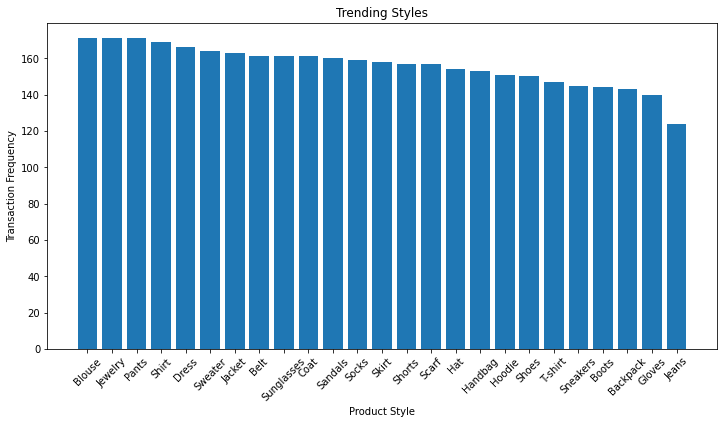

In [340]:
# Analyze transaction frequency for each product style - Helpful to see what people are buying/what is popular
style_frequency = behavior_data['item'].value_counts()

# Visualize trending styles
plt.figure(figsize=(12, 6))
plt.bar(style_frequency.index, style_frequency.values)
plt.title('Trending Styles')
plt.xlabel('Product Style')
plt.ylabel('Transaction Frequency')
plt.xticks(rotation=45)
plt.show()

## Trending Colors - Color Purchase Frequency

In [341]:
# Calculate the transaction frequency for each product color
color_frequency = behavior_data['color'].value_counts().reset_index()
color_frequency.columns = ['Product Color', 'Transaction Frequency']

# Print the transaction frequency for each product color
print("Transaction Frequency for Each Product Color:")
print(color_frequency)

Transaction Frequency for Each Product Color:
   Product Color  Transaction Frequency
0          Olive                    177
1         Yellow                    174
2         Silver                    173
3           Teal                    172
4          Green                    169
5          Black                    167
6           Cyan                    166
7         Violet                    166
8           Gray                    159
9         Maroon                    158
10        Orange                    154
11      Charcoal                    153
12          Pink                    153
13       Magenta                    152
14          Blue                    152
15        Purple                    151
16         Peach                    149
17           Red                    148
18         Beige                    147
19        Indigo                    147
20      Lavender                    147
21     Turquoise                    145
22         White                  

In [342]:
# Exploring the Most Preferred Colors
preferred_colors = behavior_data['color'].value_counts()
print("\nPreferred Colors:")
print(preferred_colors)


Preferred Colors:
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: color, dtype: int64


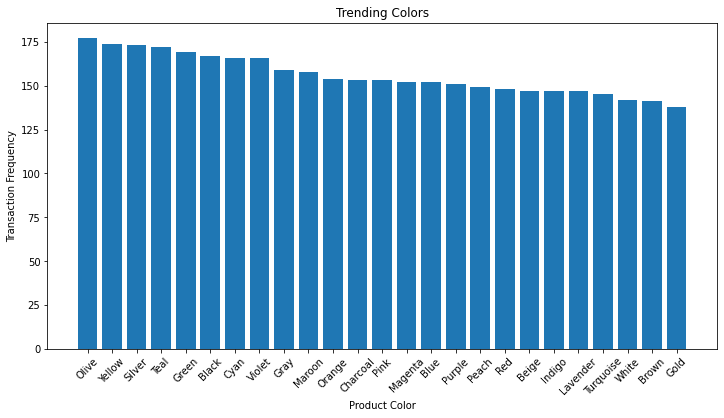

In [343]:
# Analyze transaction frequency for each Product Color - to find the trending colors 
color_frequency = behavior_data['color'].value_counts()


# Visualize trending colors
plt.figure(figsize=(12, 6))
plt.bar(color_frequency.index, color_frequency.values)
plt.title('Trending Colors')
plt.xlabel('Product Color')
plt.ylabel('Transaction Frequency')
plt.xticks(rotation=45)
plt.show()

## Average Ratings

In [344]:
# Average rating by item type
average_rating_by_type = behavior_data.groupby('type')['rating'].mean().sort_values(ascending=False)
print(average_rating_by_type)

type
Footwear       3.790651
Accessories    3.768629
Outerwear      3.746914
Clothing       3.723143
Name: rating, dtype: float64


## Distribution of Product Ratings

In [345]:
# Print the distribution of product ratings
print("Distribution of Product Ratings:")
print(behavior_data['rating'].value_counts().sort_index())

Distribution of Product Ratings:
2.5     66
2.6    159
2.7    154
2.8    136
2.9    170
3.0    162
3.1    157
3.2    152
3.3    152
3.4    182
3.5    156
3.6    149
3.7    156
3.8    142
3.9    163
4.0    181
4.1    148
4.2    171
4.3    147
4.4    158
4.5    139
4.6    174
4.7    148
4.8    144
4.9    166
5.0     68
Name: rating, dtype: int64


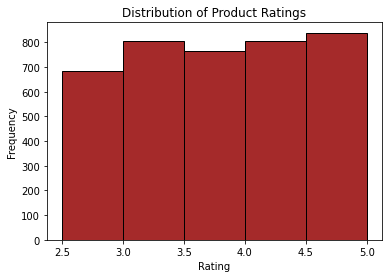

In [346]:
# Distribution of Ratings and Satisfaction - Histogram
plt.hist(behavior_data['rating'], bins=5, color='brown', edgecolor='black')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

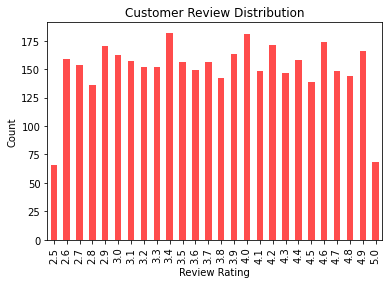

In [347]:
# Customer Reviews
behavior_data['rating'].value_counts().sort_index().plot(kind='bar', color='red', alpha=0.7)
plt.title('Customer Review Distribution')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.show()

## Customer Segmentation

In [348]:
# Customer Segmentation
customer_segmentation = behavior_data.groupby('customer_id').agg({
    'amount': 'sum',
    'frequency': 'mean',
    'rating': 'mean'
}).reset_index()
customer_segmentation.columns = ['customer_id', 'TotalSpending', 'frequency', 'rating']

In [349]:
# Customer Segmentation
customer_segmentation = behavior_data.groupby('customer_id').agg({
    'amount': 'sum',
    'frequency': 'mean',
    'rating': 'mean'
}).reset_index()
customer_segmentation.columns = ['CustomerID', 'TotalSpending', 'AveragePurchaseFrequency', 'AverageRating']

# Displaying the results of customer segmentation
print("\nCustomer Segmentation:")
print(customer_segmentation.head())


Customer Segmentation:
   CustomerID  TotalSpending  AveragePurchaseFrequency  AverageRating
0           1             53                     104.0            3.1
1           2             64                     104.0            3.1
2           3             73                      52.0            3.1
3           4             90                      52.0            3.5
4           5             49                       1.0            2.7


   customer_id  age gender     item      type  amount       location size  \
0            1   55   Male   Blouse  Clothing      53       Kentucky    L   
1            2   19   Male  Sweater  Clothing      64          Maine    L   
2            3   50   Male    Jeans  Clothing      73  Massachusetts    S   
3            4   21   Male  Sandals  Footwear      90   Rhode Island    M   
4            5   45   Male   Blouse  Clothing      49         Oregon    M   

       color  season  rating sub_status      ship_type discount promo_use  \
0       Gray  Winter     3.1        Yes        Express      Yes       Yes   
1     Maroon  Winter     3.1        Yes        Express      Yes       Yes   
2     Maroon  Spring     3.1        Yes  Free Shipping      Yes       Yes   
3     Maroon  Spring     3.5        Yes   Next Day Air      Yes       Yes   
4  Turquoise  Spring     2.7        Yes  Free Shipping      Yes       Yes   

   previous_order   pay_method  times  
0              14        Venmo    

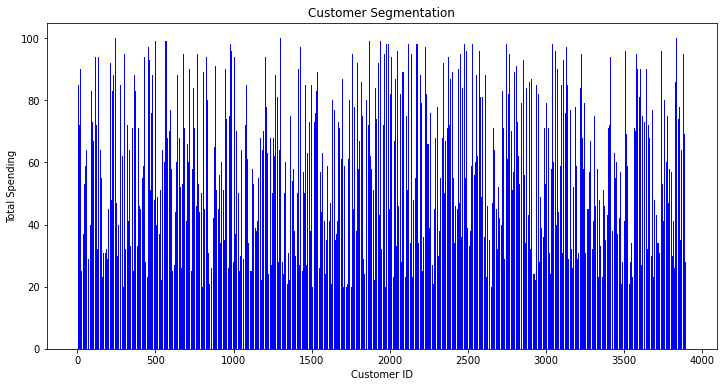

In [350]:
# Explore relevant columns
print(behavior_data[['customer_id', 'age', 'gender', 'item', 'type', 'amount', 'location',
                     'size', 'color', 'season', 'rating', 'sub_status', 'ship_type',
                     'discount', 'promo_use', 'previous_order', 'pay_method',
                     'times']].head())

# Customer Segmentation
customer_segmentation = behavior_data.groupby('customer_id').agg({
    'amount': 'sum',
    'times': 'mean',
    'rating': 'mean'
}).reset_index()
customer_segmentation.columns = ['CustomerID', 'TotalSpending', 'AveragePurchaseFrequency', 'AverageRating']

# Visualize customer segmentation with bar chart
plt.figure(figsize=(12, 6))
plt.bar(customer_segmentation['CustomerID'], customer_segmentation['TotalSpending'], color='blue')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.title('Customer Segmentation')
plt.show()

In [351]:
selected_features = ['age', 'amount', 'rating', 'previous_order']

# Filter the DataFrame to include only selected features
X = behavior_data[selected_features]

# Handle missing values or outliers if necessary
X = X.dropna()  # Drop rows with missing values for simplicity

# Define the number of bins for each feature
age_bins = [18, 30, 50, 100]  # Adjust age bins as needed
amount_bins = [0, 50, 100, 150, 200]  # Adjust amount bins as needed
rating_bins = [0, 3, 4, 5]  # Adjust rating bins as needed
order_bins = [0, 20, 50, 100]  # Adjust order bins as needed

# Create bins for each feature using cut
X['age_bin'] = pd.cut(X['age'], bins=age_bins, labels=['18-30', '30-50', '50+'])
X['amount_bin'] = pd.cut(X['amount'], bins=amount_bins, labels=['0-50', '50-100', '100-150', '150-200'])
X['rating_bin'] = pd.cut(X['rating'], bins=rating_bins, labels=['0-3', '3-4', '4-5'])
X['order_bin'] = pd.cut(X['previous_order'], bins=order_bins, labels=['0-20', '20-50', '50-100'])

# Combine the bins to create a 'Segment' column
X['Segment'] = X['age_bin'].astype(str) + '_' + X['amount_bin'].astype(str) + '_' + X['rating_bin'].astype(str) + '_' + X['order_bin'].astype(str)

In [352]:
# Analyze segments
segment_analysis = X.groupby('Segment').mean()
print(segment_analysis)

                              age     amount    rating  previous_order
Segment                                                               
18-30_0-50_0-3_0-20     24.833333  36.111111  2.866667       11.166667
18-30_0-50_0-3_20-50    25.222222  35.355556  2.820000       34.422222
18-30_0-50_3-4_0-20     24.733333  33.266667  3.581667        9.433333
18-30_0-50_3-4_20-50    24.985507  34.333333  3.547826       35.420290
18-30_0-50_4-5_0-20     24.381818  32.781818  4.607273        9.727273
18-30_0-50_4-5_20-50    24.157895  33.815789  4.503947       32.657895
18-30_50-100_0-3_0-20   24.259259  76.092593  2.775926       12.518519
18-30_50-100_0-3_20-50  25.200000  75.333333  2.813333       34.733333
18-30_50-100_3-4_0-20   24.849462  77.010753  3.505376        9.752688
18-30_50-100_3-4_20-50  24.227642  74.528455  3.533333       36.276423
18-30_50-100_4-5_0-20   24.518072  75.518072  4.515663       10.783133
18-30_50-100_4-5_20-50  24.555556  75.937500  4.542361       36.798611
30-50_

/tmp/ipykernel_3159609/612804665.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segment_analysis = X.groupby('Segment').mean()


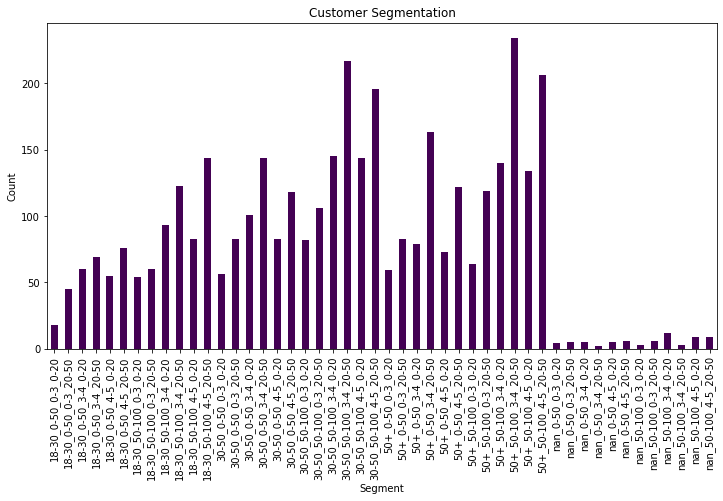

In [353]:
# Visualize customer segmentation
plt.figure(figsize=(12, 6))
X['Segment'].value_counts().sort_index().plot(kind='bar', colormap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

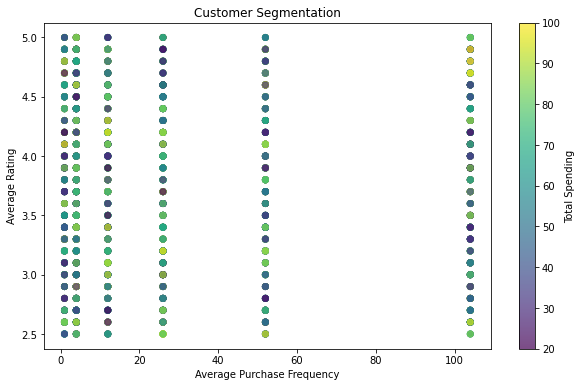

In [354]:
# Customer Segmentation
customer_segmentation = behavior_data.groupby('customer_id').agg({
    'amount': 'sum',
    'times': 'mean',  # Use mean for the average frequency
    'rating': 'mean'
}).reset_index()
customer_segmentation.columns = ['CustomerID', 'TotalSpending', 'AveragePurchaseFrequency', 'AverageRating']

# Visualize customer segmentation
plt.figure(figsize=(10, 6))
plt.scatter(
    customer_segmentation['AveragePurchaseFrequency'],
    customer_segmentation['AverageRating'],
    c=customer_segmentation['TotalSpending'],
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(label='Total Spending')
plt.title('Customer Segmentation')
plt.xlabel('Average Purchase Frequency')
plt.ylabel('Average Rating')
plt.show()

In [355]:
# Customer Segmentation
# Segmenting customers based on age groups
behavior_data['age_group'] = pd.cut(behavior_data['age'], bins=[0, 18, 30, 50, float('inf')], labels=['<18', '18-30', '30-50', '50+'])

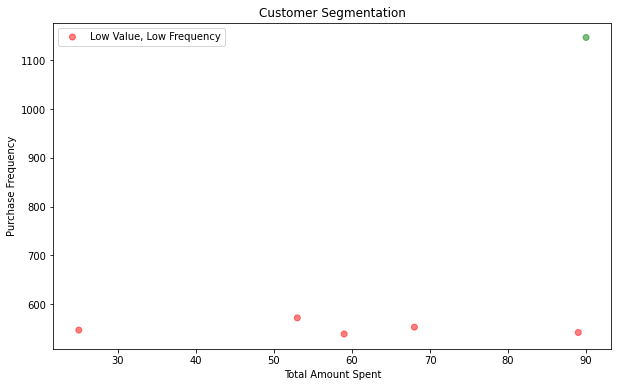

In [400]:
# Define segmentation thresholds
high_value_threshold = segmentation_data['TotalAmountSpent'].quantile(0.8)
high_frequency_threshold = segmentation_data['PurchaseFrequency'].quantile(0.8)

# Create segments
segmentation_data['Segment'] = 'Low Value, Low Frequency'
segmentation_data.loc[(segmentation_data['TotalAmountSpent'] > high_value_threshold) & (segmentation_data['PurchaseFrequency'] > high_frequency_threshold), 'Segment'] = 'High Value, High Frequency'

# Visualize the segments
plt.figure(figsize=(10, 6))
colors = {'Low Value, Low Frequency': 'red', 'High Value, High Frequency': 'green'}
plt.scatter(segmentation_data['TotalAmountSpent'], segmentation_data['PurchaseFrequency'], c=segmentation_data['Segment'].map(colors), alpha=0.5)
plt.title('Customer Segmentation')
plt.xlabel('Total Amount Spent')
plt.ylabel('Purchase Frequency')
plt.legend(colors)
plt.show()

In [356]:
# Define feature ranges
age_ranges = {'18-30': (18, 30), '30-50': (30, 50), '50+': (50, 100)}
amount_ranges = {'0-50': (0, 50), '50-100': (50, 100), '100-150': (100, 150), '150-200': (150, 200)}
rating_ranges = {'0-3': (0, 3), '3-4': (3, 4), '4-5': (4, 5)}
order_ranges = {'0-20': (0, 20), '20-50': (20, 50), '50-100': (50, 100)}

# Create a key for interpreting the segments
key = {
    'age': age_ranges,
    'amount': amount_ranges,
    'rating': rating_ranges,
    'previous_order': order_ranges
}

# Display the key
for feature, ranges in key.items():
    print(f"{feature.capitalize()} Ranges:")
    for label, (start, end) in ranges.items():
        print(f"  {label}: {start}-{end}")
    print()

Age Ranges:
  18-30: 18-30
  30-50: 30-50
  50+: 50-100

Amount Ranges:
  0-50: 0-50
  50-100: 50-100
  100-150: 100-150
  150-200: 150-200

Rating Ranges:
  0-3: 0-3
  3-4: 3-4
  4-5: 4-5

Previous_order Ranges:
  0-20: 0-20
  20-50: 20-50
  50-100: 50-100



"18-30_0-50_0-3_0-20" can be interpreted as follows:

- Age: 18-30
- Amount: 0-50
- Rating: 0-3
- Previous Order: 0-20

## Payment Methods

In [357]:
# Calculate the payment method distribution
payment_method_distribution = behavior_data['pay_method'].value_counts().reset_index()
payment_method_distribution.columns = ['Payment Method', 'Frequency']

# Print the payment method distribution
print("Payment Method Distribution:")
print(payment_method_distribution)

Payment Method Distribution:
  Payment Method  Frequency
0         PayPal        677
1    Credit Card        671
2           Cash        670
3     Debit Card        636
4          Venmo        634
5  Bank Transfer        612


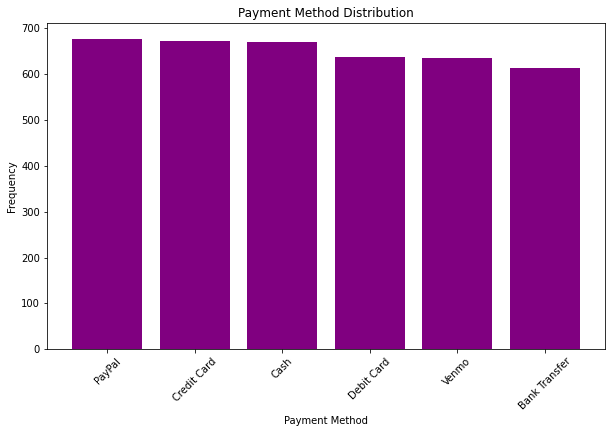

In [358]:
# Payment method distribution
payment_method_distribution = behavior_data['pay_method'].value_counts()

# Visualize payment method distribution
plt.figure(figsize=(10, 6))
plt.bar(payment_method_distribution.index, payment_method_distribution.values, color='purple')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Popular Sizes - Sizes Purchase Frequency

In [359]:
# Exploring the Most Preferred Sizes
preferred_sizes = behavior_data['size'].value_counts()

print("Preferred Sizes:")
print(preferred_sizes)

Preferred Sizes:
M     1755
L     1053
S      663
XL     429
Name: size, dtype: int64


## Frequency of Types of Item

In [360]:
# Calculate the transaction frequency for each item type
popular_item_types = behavior_data['type'].value_counts().reset_index()
popular_item_types.columns = ['Item Type', 'Transaction Frequency']

# Print the transaction frequency for each item type
print("Transaction Frequency for Each Item Type:")
print(item_type_frequency)

Transaction Frequency for Each Item Type:
     Item Type  Transaction Frequency
0     Clothing                   1737
1  Accessories                   1240
2     Footwear                    599
3    Outerwear                    324


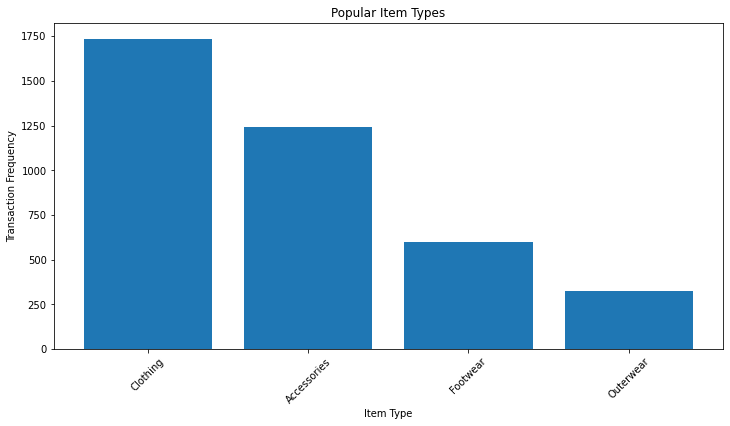

In [361]:
# Most popular item types
popular_item_types = behavior_data['type'].value_counts()

# Visualize popular item types
plt.figure(figsize=(12, 6))
plt.bar(popular_item_types.index, popular_item_types.values)
plt.title('Popular Item Types')
plt.xlabel('Item Type')
plt.ylabel('Transaction Frequency')
plt.xticks(rotation=45)
plt.show()

## Age Distribution

In [362]:
# Print the age distribution
print("Age Distribution:")
print(behavior_data['age'].describe())

Age Distribution:
count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: age, dtype: float64


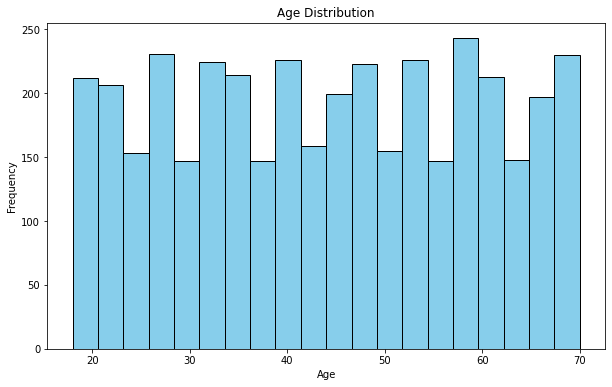

In [363]:
# Visualize age distribution
plt.figure(figsize=(10, 6))
plt.hist(behavior_data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Gender Distribution

In [364]:
# Print the gender distribution
print("Gender Distribution:")
print(behavior_data['gender'].value_counts())

Gender Distribution:
Male      2652
Female    1248
Name: gender, dtype: int64


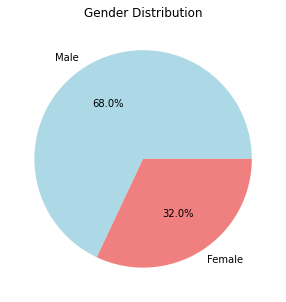

In [365]:
# Visualize gender distribution
gender_distribution = behavior_data['gender'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()

## Geographical Location of Customers

In [366]:
# Calculate the geographical distribution of customers
location_distribution = behavior_data['location'].value_counts().reset_index()
location_distribution.columns = ['Location', 'Frequency']

# Print the geographical distribution of customers
print("Geographical Distribution of Customers:")
print(location_distribution)

Geographical Distribution of Customers:
          Location  Frequency
0          Montana         96
1       California         95
2            Idaho         93
3         Illinois         92
4          Alabama         89
5        Minnesota         88
6         Nebraska         87
7         New York         87
8           Nevada         87
9         Maryland         86
10        Delaware         86
11         Vermont         85
12       Louisiana         84
13    North Dakota         83
14        Missouri         81
15   West Virginia         81
16      New Mexico         81
17     Mississippi         80
18         Indiana         79
19         Georgia         79
20        Kentucky         79
21        Arkansas         79
22  North Carolina         78
23     Connecticut         78
24        Virginia         77
25            Ohio         77
26       Tennessee         77
27           Texas         77
28           Maine         77
29  South Carolina         76
30        Colorado         75


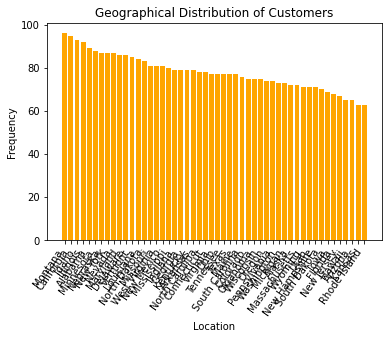

In [367]:
# Location Analysis
location_distribution = behavior_data['location'].value_counts()
plt.bar(location_distribution.index, location_distribution.values, color='orange')
plt.title('Geographical Distribution of Customers')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=55, ha='right')
plt.show()

## Total Amount Spent by Each Customer

In [368]:
# Average Order Value (AOV)

# Calculate the average order value (AOV)
average_order_value = behavior_data['amount'].mean()

# Print the average order value
print("Average Order Value:", average_order_value)

Average Order Value: 59.76435897435898


In [369]:
# Calculate the total amount spent by each customer
total_amount_spent = behavior_data.groupby('customer_id')['amount'].sum().reset_index()
total_amount_spent.columns = ['Customer ID', 'Total Amount Spent']

# Print the total amount spent by customers
print("Total Amount Spent by Customers:")
print(total_amount_spent)

Total Amount Spent by Customers:
      Customer ID  Total Amount Spent
0               1                  53
1               2                  64
2               3                  73
3               4                  90
4               5                  49
...           ...                 ...
3895         3896                  28
3896         3897                  49
3897         3898                  33
3898         3899                  77
3899         3900                  81

[3900 rows x 2 columns]


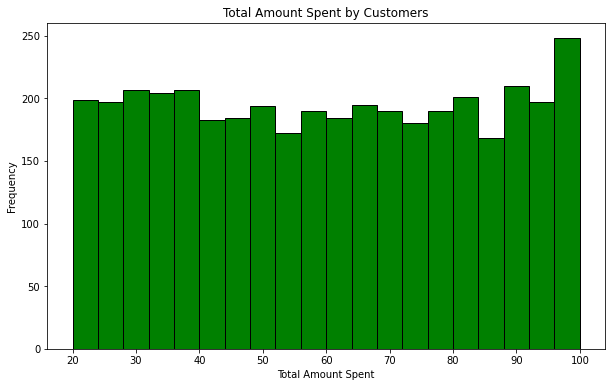

In [370]:
# Total amount spent by customers
total_amount_spent = behavior_data.groupby('customer_id')['amount'].sum()

# Visualize total amount spent
plt.figure(figsize=(10, 6))
plt.hist(total_amount_spent, bins=20, color='green', edgecolor='black')
plt.title('Total Amount Spent by Customers')
plt.xlabel('Total Amount Spent')
plt.ylabel('Frequency')
plt.show()

## Seasonal Transactions

In [371]:
# Calculate the transaction frequency for each season
seasonal_transaction_frequency = behavior_data['season'].value_counts().reset_index()
seasonal_transaction_frequency.columns = ['Season', 'Transaction Frequency']

# Print the transaction frequency by season
print("Transaction Frequency by Season:")
print(seasonal_transaction_frequency)

Transaction Frequency by Season:
   Season  Transaction Frequency
0  Spring                    999
1    Fall                    975
2  Winter                    971
3  Summer                    955


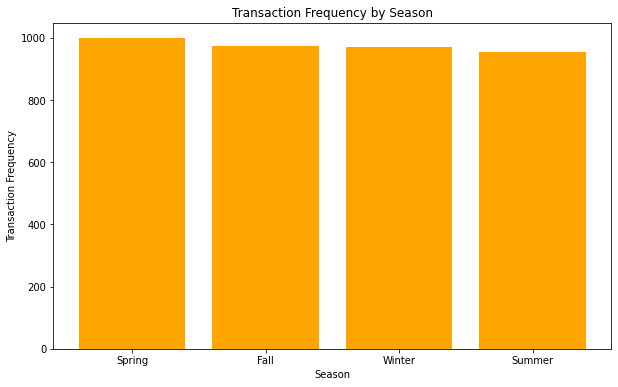

In [372]:
# Transaction frequency by season
seasonal_transaction_frequency = behavior_data['season'].value_counts()

# Visualize seasonal transaction frequency
plt.figure(figsize=(10, 6))
plt.bar(seasonal_transaction_frequency.index, seasonal_transaction_frequency.values, color='orange')
plt.title('Transaction Frequency by Season')
plt.xlabel('Season')
plt.ylabel('Transaction Frequency')
plt.show()

In [373]:
# Calculate the seasonal trends in purchases
seasonal_trends = behavior_data.groupby('season')['amount'].sum().reset_index()
seasonal_trends.columns = ['Season', 'Total Amount Spent']

# Print the seasonal trends in purchases
print("Seasonal Trends in Purchases:")
print(seasonal_trends)

Seasonal Trends in Purchases:
   Season  Total Amount Spent
0    Fall               60018
1  Spring               58679
2  Summer               55777
3  Winter               58607


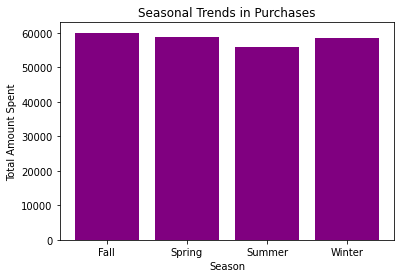

In [374]:
# Seasonal Trends
seasonal_trends = behavior_data.groupby('season')['amount'].sum()
plt.bar(seasonal_trends.index, seasonal_trends.values, color='purple')
plt.title('Seasonal Trends in Purchases')
plt.xlabel('Season')
plt.ylabel('Total Amount Spent')
plt.show()

### Purchase Frequency

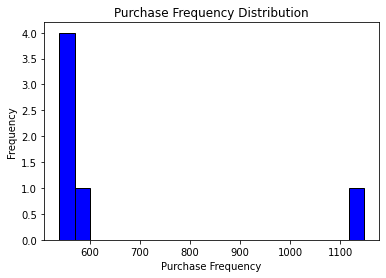

In [401]:
# Plot Purchase Frequency Distribution
plt.hist(segmentation_data['PurchaseFrequency'], bins=20, color='blue', edgecolor='black')
plt.title('Purchase Frequency Distribution')
plt.xlabel('Purchase Frequency')
plt.ylabel('Frequency')
plt.show()

## Subscription Status of Customers

In [377]:
# Calculate the distribution of customers by subscription status
subscription_distribution = behavior_data['sub_status'].value_counts().reset_index()
subscription_distribution.columns = ['Subscription Status', 'Frequency']

# Print the distribution of customers by subscription status
print("Distribution of Customers by Subscription Status:")
print(subscription_distribution)

Distribution of Customers by Subscription Status:
  Subscription Status  Frequency
0                  No       2847
1                 Yes       1053


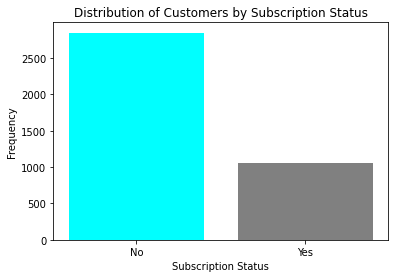

In [378]:
# Subscription Status Analysis
subscription_distribution = behavior_data['sub_status'].value_counts()
plt.bar(subscription_distribution.index, subscription_distribution.values, color=['cyan', 'gray'])
plt.title('Distribution of Customers by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Frequency')
plt.show()

## Shipping Preferences of Customers

In [379]:
# Calculate the distribution of shipping preferences
shipping_distribution = behavior_data['ship_type'].value_counts().reset_index()
shipping_distribution.columns = ['Shipping Type', 'Frequency']

# Print the distribution of shipping preferences
print("Shipping Preferences Distribution:")
print(shipping_distribution)

Shipping Preferences Distribution:
    Shipping Type  Frequency
0   Free Shipping        675
1        Standard        654
2    Store Pickup        650
3    Next Day Air        648
4         Express        646
5  2-Day Shipping        627


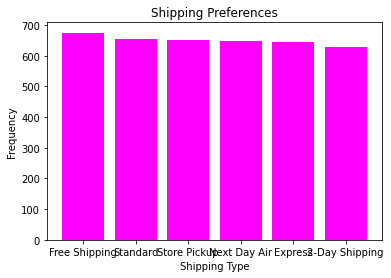

In [380]:
# Shipping Preferences
shipping_distribution = behavior_data['ship_type'].value_counts()
plt.bar(shipping_distribution.index, shipping_distribution.values, color='magenta')
plt.title('Shipping Preferences')
plt.xlabel('Shipping Type')
plt.ylabel('Frequency')
plt.show()

## Discount & Promo Usage Customers

In [381]:
# Calculate the distribution of discount and promo usage
discount_usage = behavior_data['promo_use'].value_counts().reset_index()
discount_usage.columns = ['Promo Use', 'Frequency']

# Print the distribution of discount and promo usage
print("Discount and Promo Usage Distribution:")
print(discount_usage)

Discount and Promo Usage Distribution:
  Promo Use  Frequency
0        No       2223
1       Yes       1677


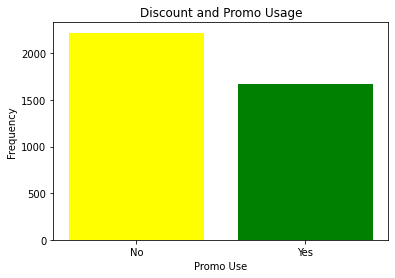

In [382]:
# Discount and Promo Usage
discount_usage = behavior_data['promo_use'].value_counts()
plt.bar(discount_usage.index, discount_usage.values, color=['yellow', 'green'])
plt.title('Discount and Promo Usage')
plt.xlabel('Promo Use')
plt.ylabel('Frequency')
plt.show()

## Frequency of Repeat Purchases

In [395]:
# Calculate the frequency of repeat purchases by customers
repeat_purchase_frequency = behavior_data['frequency'].value_counts().reset_index()
repeat_purchase_frequency.columns = ['Number of Purchases', 'Frequency']

# Print the frequency of repeat purchases by customers
print("Frequency of Repeat Purchases by Customers:")
print(repeat_purchase_frequency)


Frequency of Repeat Purchases by Customers:
   Number of Purchases  Frequency
0                    4       1147
1                    1        572
2                   12        553
3                   26        547
4                  104        542
5                   52        539


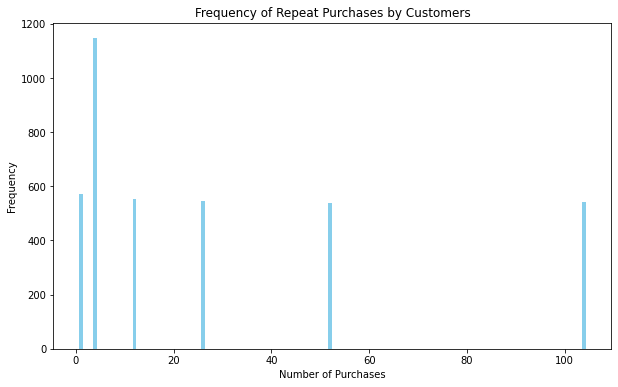

In [396]:
# Visualize the frequency of repeat purchases
plt.figure(figsize=(10, 6))
plt.bar(repeat_purchase_frequency['Number of Purchases'], repeat_purchase_frequency['Frequency'], color='skyblue')
plt.title('Frequency of Repeat Purchases by Customers')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.show()

# Customer Segmentation (Attempt & Work)

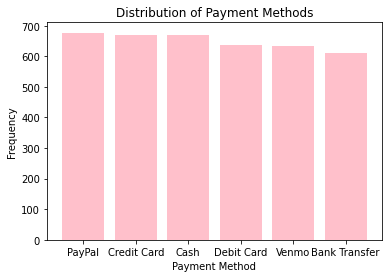

In [245]:
# Payment Method Analysis
payment_method_distribution = behavior_data['pay_method'].value_counts()
plt.bar(payment_method_distribution.index, payment_method_distribution.values, color='pink')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.show()

In [255]:
# Describe characteristics of the columns
description = customer_segmentation[['AveragePurchaseFrequency', 'AverageRating', 'TotalSpending']].describe()

# Print the descriptive statistics
print(description)

       AveragePurchaseFrequency  AverageRating  TotalSpending
count               3900.000000    3900.000000    3900.000000
mean                  28.311282       3.749949      59.764359
std                   34.579117       0.716223      23.685392
min                    1.000000       2.500000      20.000000
25%                    4.000000       3.100000      39.000000
50%                   12.000000       3.700000      60.000000
75%                   52.000000       4.400000      81.000000
max                  104.000000       5.000000     100.000000


In [256]:
# Check for missing values
missing_values = customer_segmentation['AveragePurchaseFrequency'].isnull().sum()
print(f"Number of missing values in 'AveragePurchaseFrequency': {missing_values}")

Number of missing values in 'AveragePurchaseFrequency': 0


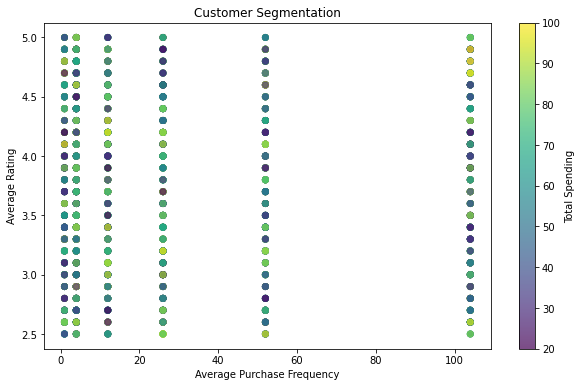

In [257]:
# Customer Segmentation
customer_segmentation = behavior_data.groupby('customer_id').agg({
    'amount': 'sum',
    'times': 'mean',  # Use mean for the average frequency
    'rating': 'mean'
}).reset_index()
customer_segmentation.columns = ['CustomerID', 'TotalSpending', 'AveragePurchaseFrequency', 'AverageRating']

# Visualize customer segmentation
plt.figure(figsize=(10, 6))
plt.scatter(
    customer_segmentation['AveragePurchaseFrequency'],
    customer_segmentation['AverageRating'],
    c=customer_segmentation['TotalSpending'],
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(label='Total Spending')
plt.title('Customer Segmentation')
plt.xlabel('Average Purchase Frequency')
plt.ylabel('Average Rating')
plt.show()

In [262]:
# Check data types
print(behavior_data['frequency'].dtype)

# Check unique values before mapping
print("Unique Values Before Mapping:", behavior_data['frequency'].unique())

# Map the values
behavior_data['frequency'] = behavior_data['frequency'].map(frequency_mapping)

# Check unique values after mapping
print("Unique Values After Mapping:", behavior_data['frequency'].unique())

int64
Unique Values Before Mapping: [104  52   1   4  26  12]
Unique Values After Mapping: [nan]


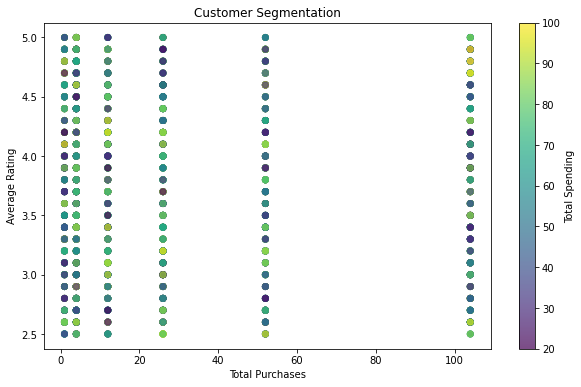

In [293]:
# Customer Segmentation
customer_segmentation = behavior_data.groupby('customer_id').agg({
    'frequency': 'sum',  # Assuming 'frequency' is the number of purchases per customer
    'amount': 'sum',
    'rating': 'mean'
}).reset_index()

# Rename the columns
customer_segmentation.columns = ['CustomerID', 'TotalPurchases', 'TotalSpending', 'AverageRating']

# Visualize customer segmentation
plt.figure(figsize=(10, 6))
plt.scatter(customer_segmentation['TotalPurchases'], customer_segmentation['AverageRating'], c=customer_segmentation['TotalSpending'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Total Spending')
plt.title('Customer Segmentation')
plt.xlabel('Total Purchases')
plt.ylabel('Average Rating')
plt.show()


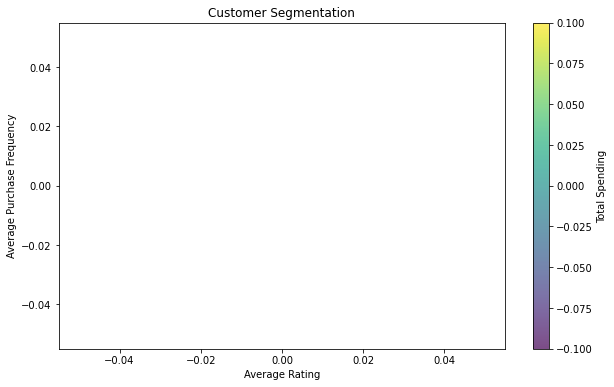

In [264]:
# Customer Segmentation
customer_segmentation = behavior_data.groupby('customer_id').agg({
    'amount': 'sum',
    'frequency': 'mean',
    'rating': 'mean'
}).reset_index()
customer_segmentation.columns = ['CustomerID', 'TotalSpending', 'AveragePurchaseFrequency', 'AverageRating']

# Visualize customer segmentation
plt.figure(figsize=(10, 6))
plt.scatter(customer_segmentation['AverageRating'], customer_segmentation['AveragePurchaseFrequency'], c=customer_segmentation['TotalSpending'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Total Spending')
plt.title('Customer Segmentation')
plt.xlabel('Average Rating')
plt.ylabel('Average Purchase Frequency')
plt.show()

In [144]:
# Convert 'frequency_purchase' to the 'object' data type
behavior_data['frequency_purchase'] = behavior_data['frequency_purchase'].astype('object')

In [145]:
# Define the corrected mapping dictionary
frequency_mapping = {
    'Fortnightly': 26,  # Assuming 26 fortnights in a year
    'Monthly': 12,
    'Quarterly': 4,
    'Bi-Weekly': 26,
    'Every 3 Months': 4,  # Assuming 4 quarters in a year
    'Weekly': 52,
    'Annually': 1,
}

# Map the values in 'frequency_purchase' using the corrected mapping dictionary
behavior_data['frequency_purchase_numeric'] = behavior_data['frequency_purchase'].map(frequency_mapping)

In [296]:
print(behavior_data['frequency'].describe())

count    3900.000000
mean       28.311282
std        34.579117
min         1.000000
25%         4.000000
50%        12.000000
75%        52.000000
max       104.000000
Name: frequency, dtype: float64


In [297]:
print(behavior_data['times'].unique())

[nan]


In [168]:
#### print(behavior_data.head())

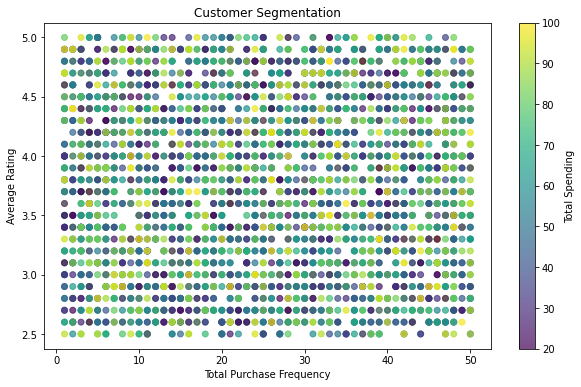

In [295]:
# Customer Segmentation
customer_segmentation = behavior_data.groupby('customer_id').agg({
    'amount': 'sum',
    'previous_order': 'sum',  # Corrected to use sum for frequency
    'rating': 'mean'
}).reset_index()
customer_segmentation.columns = ['CustomerID', 'TotalSpending', 'TotalPurchaseFrequency', 'AverageRating']

# Visualize customer segmentation
plt.figure(figsize=(10, 6))
plt.scatter(customer_segmentation['TotalPurchaseFrequency'], customer_segmentation['AverageRating'], c=customer_segmentation['TotalSpending'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Total Spending')
plt.title('Customer Segmentation')
plt.xlabel('Total Purchase Frequency')
plt.ylabel('Average Rating')
plt.show()

<Figure size 864x432 with 0 Axes>

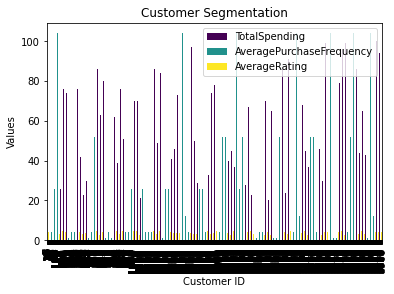

In [267]:
# Bar Plot for Customer Segmentation
plt.figure(figsize=(12, 6))
customer_segmentation.set_index('CustomerID').plot(kind='bar', colormap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Customer ID')
plt.ylabel('Values')
plt.show()

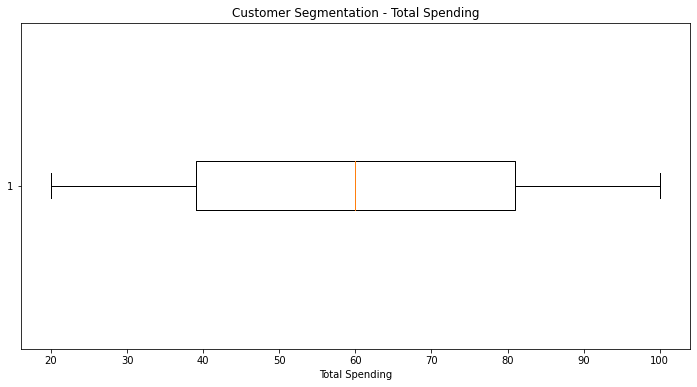

In [266]:
# Box Plot for Customer Segmentation
plt.figure(figsize=(12, 6))
plt.boxplot(customer_segmentation['TotalSpending'], vert=False)
plt.title('Customer Segmentation - Total Spending')
plt.xlabel('Total Spending')
plt.show()

   CustomerID  TotalSpending  AveragePurchaseFrequency  AverageRating
0           1             53                     104.0            3.1
1           2             64                     104.0            3.1
2           3             73                      52.0            3.1
3           4             90                      52.0            3.5
4           5             49                       1.0            2.7


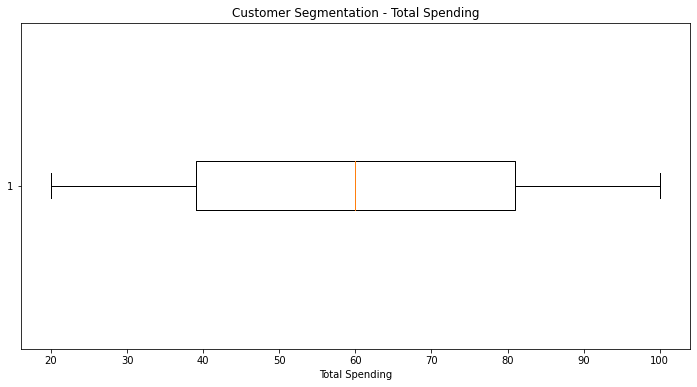

In [265]:
# Assuming behavior_data is your DataFrame

# Customer Segmentation
customer_segmentation = behavior_data.groupby('customer_id').agg({
    'amount': 'sum',
    'times': 'mean',
    'rating': 'mean'
}).reset_index()
customer_segmentation.columns = ['CustomerID', 'TotalSpending', 'AveragePurchaseFrequency', 'AverageRating']

# Display the first few rows of customer_segmentation
print(customer_segmentation.head())

# Box Plot for Customer Segmentation - Total Spending
plt.figure(figsize=(12, 6))
plt.boxplot(customer_segmentation['TotalSpending'], vert=False)
plt.title('Customer Segmentation - Total Spending')
plt.xlabel('Total Spending')
plt.show()